In [1]:
import numpy as np
import matplotlib.pyplot as plt

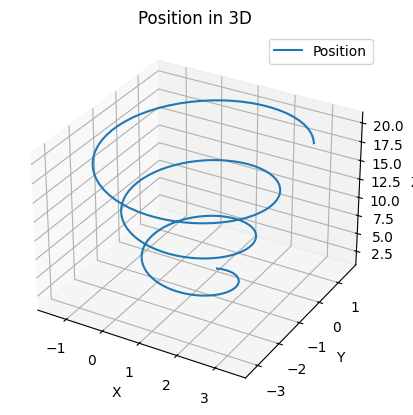

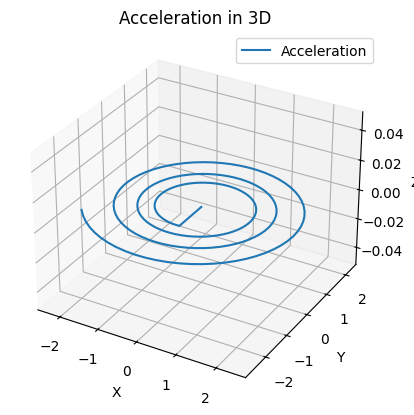

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def aMagnetic(m, q, v, B):
    return (q / m) * np.cross(v, B)

v0 = np.array([1, 0, 1])
q1 = 1
m = 1
B = np.array([0, 0, 1])
r1 = np.array([1, 0, 1])  # Initial position of the particle

# Define time range for the interaction
t = np.linspace(0, 20, 200)

# Initialize arrays to store positions, velocities, and accelerations
r = np.zeros((len(t), 3))
v = np.zeros((len(t), 3))
a = np.zeros((len(t), 3)) # The acceleration initially is setup to zero

# Set initial values
v[0] = v0
r[0] = r1

# Calculate acceleration, velocity, and position for each time step
for i in range(1, len(t)):
    a[i] = aMagnetic(m, q1, v[i-1], B)
    v[i] = v[i-1] + a[i] * (t[i] - t[i-1])
    r[i] = r[i-1] + v[i-1] * (t[i] - t[i-1]) + 0.5 * a[i-1] * (t[i] - t[i-1])**2

# Create 3D plot for position
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(r[:, 0], r[:, 1], r[:, 2], label='Position')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Position in 3D')
plt.legend()
plt.show()

# Create 3D plot for velocity
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(v[:, 0], v[:, 1], v[:, 2], label='Velocity')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Velocity in 3D')
plt.legend()
plt.show()

# Create 3D plot for acceleration
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(a[:, 0], a[:, 1], a[:, 2], label='Acceleration')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Acceleration in 3D')
plt.legend()
plt.show()


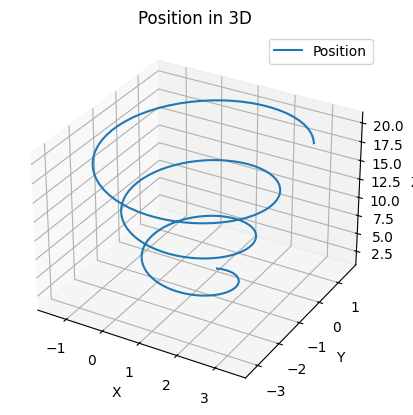

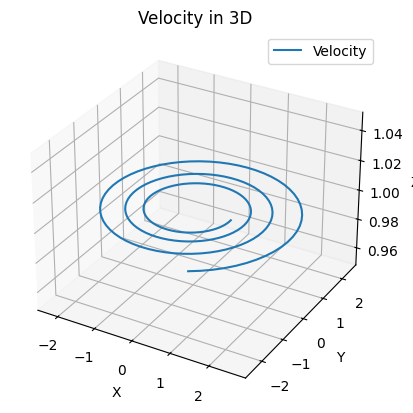

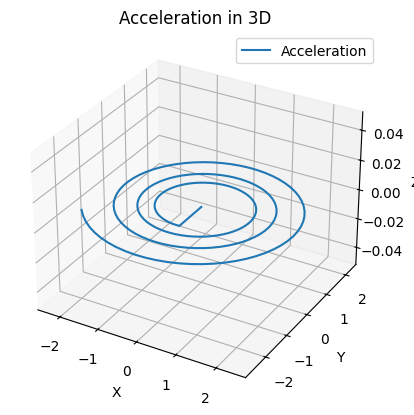

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_particle_motion(v0, q1, m, B, r1, t_end=20, num_steps=200):
    def aMagnetic(m, q, v, B):
        return (q / m) * np.cross(v, B)

    # Define time range
    t = np.linspace(0, t_end, num_steps)

    # Initialize arrays to store positions, velocities, and accelerations
    r = np.zeros((len(t), 3))
    v = np.zeros((len(t), 3))
    a = np.zeros((len(t), 3))

    # Set initial values
    v[0] = v0
    r[0] = r1

    # Calculate acceleration, velocity, and position for each time step
    for i in range(1, len(t)):
        a[i] = aMagnetic(m, q1, v[i-1], B)
        v[i] = v[i-1] + a[i] * (t[i] - t[i-1])
        r[i] = r[i-1] + v[i-1] * (t[i] - t[i-1]) + 0.5 * a[i-1] * (t[i] - t[i-1])**2

    return r, v, a

# Example usage:
v0 = np.array([1, 0, 1])
q1 = 1
m = 1
B = np.array([0, 0, 1])
r1 = np.array([1, 0, 1])  # Initial position

r, v, a = simulate_particle_motion(v0, q1, m, B, r1)

# Plotting code
# Create 3D plot for position
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(r[:, 0], r[:, 1], r[:, 2], label='Position')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Position in 3D')
plt.legend()
plt.show()

# Create 3D plot for velocity
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(v[:, 0], v[:, 1], v[:, 2], label='Velocity')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Velocity in 3D')
plt.legend()
plt.show()

# Create 3D plot for acceleration
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(a[:, 0], a[:, 1], a[:, 2], label='Acceleration')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Acceleration in 3D')
plt.legend()
plt.show()


<Figure size 640x480 with 0 Axes>

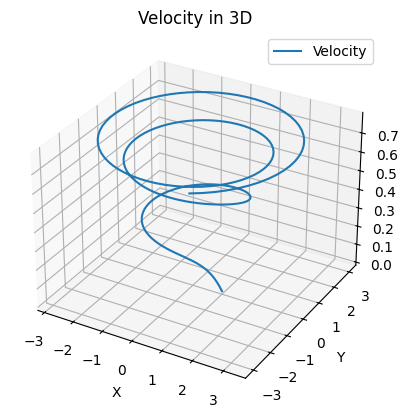

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def simulate_particle_motion(v0, q1, m, B, r1, q2, r2, t_end=20, num_steps=200):
    def aMagnetic(m, q, v, B):
        return (q / m) * np.cross(v, B)
    
    def aElectric(r1, r2, q1, q2, m,k=1):
        distance = np.linalg.norm(r2 - r1)
        direction = (r2 - r1) / distance
        return (k / m) * q1 * q2 * direction / distance**2

    # Define time range
    t = np.linspace(0, t_end, num_steps)

    # Initialize arrays to store positions, velocities, and accelerations
    r = np.zeros((len(t), 3))
    v = np.zeros((len(t), 3))
    a = np.zeros((len(t), 3))

    # Set initial values
    v[0] = v0
    r[0] = r1

    # Calculate acceleration, velocity, and position for each time step
    for i in range(1, len(t)):
        a_magnetic = aMagnetic(m, q1, v[i-1], B)
        a_electric = aElectric(r[i-1], r2, q1, q2, m)
        a_total = a_magnetic + a_electric
        v[i] = v[i-1] + a_total * (t[i] - t[i-1])
        r[i] = r[i-1] + v[i-1] * (t[i] - t[i-1]) + 0.5 * a_total * (t[i] - t[i-1])**2
        a[i] = a_total

    return r, v, a

# Example usage:
v0 = np.array([1, 0, 0])
q1 = 1
m = 1
B = np.array([0, 0, 1])
r1 = np.array([1, 0, 1])  # Initial position
q2 = -1
r2 = np.array([1, 1, 0])

r, v, a = simulate_particle_motion(v0, q1, m, B, r1, q2, r2)
'''Considerar que la partícula 2 se mueva'''

# Plotting code
# Create 3D plot for position
fig = plt.figure()
# Plotting code
# Create 3D plot for position
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(r[:, 0], r[:, 1], r[:, 2], label='Particle 1 Position')
ax.plot(r2[0], r2[1], r2[2], 'ro', label='Particle 2 Position')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Position in 3D')
plt.legend()
plt.show()

# Create 3D plot for velocity
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(v[:, 0], v[:, 1], v[:, 2], label='Velocity')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Velocity in 3D')
plt.legend()
plt.show()

# Create 3D plot for acceleration
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(a[:, 0], a[:, 1], a[:, 2], label='Acceleration')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Acceleration in 3D')
plt.legend()
plt.show()
